# Import Libraries

In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import calendar

# Load Data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT/hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


### Decription of Data

Dataset hotel_booking berasal dari artikel Dataset Permintaan Pemesanan Hotel. Dataset ini berisi 119390 observasi untuk City Hotel dan Resort Hotel. Setiap pengamatan mewakili pemesanan hotel antara 1 Juli 2015 dan 31 Agustus 2017, termasuk pemesanan yang berhasil dan pemesanan yang dibatalkan.

# Exploratory Data Analysis

## Descriptive Statistics

In [ ]:
# Mengetahui informasi umum mengenai data frame (Column, Null Values dan Dtypes)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# mengetahui jumlah baris yang kosong 
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# Memeriksa apakah ada data duplikat

df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card


In [ ]:
# Variabel Numeric

numericals = df.loc[:, (df.dtypes == int) | (df.dtypes == float)].columns.tolist()
numericals

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
# Variabel Categoric

categoricals = df.loc[:, (df.dtypes != int) & (df.dtypes != float)].columns.tolist()
categoricals

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

In [ ]:
# Variabel Target

target = df['is_canceled']

# is_canceled = Nilai yang menunjukkan apakah pemesanan dibatalkan (1) atau tidak (0).

### Statistical Summary

In [ ]:
df[numericals].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df[categoricals].describe()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,48,6,1,28


In [ ]:
# pycountry digunakan untuk mendeskripsikan secara jelas singkatan negara pada kolom 'country'

! pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pycountry

input_countries = df['country']

countries = {}
for country in pycountry.countries:
    countries[country.alpha_3] = country.name

df['countries'] = [countries.get(country, 'Unknown country') for country in input_countries]

### Counting Values

In [ ]:
for x in df:
    val = df[[x]].value_counts()
    print(val)
    print('\n')

hotel       
City Hotel      79330
Resort Hotel    40060
dtype: int64


is_canceled
0              75166
1              44224
dtype: int64


lead_time
0            6345
1            3460
2            2069
3            1816
4            1715
             ... 
370             1
424             1
532             1
709             1
737             1
Length: 479, dtype: int64


arrival_date_year
2016                 56707
2017                 40687
2015                 21996
dtype: int64


arrival_date_month
August                13877
July                  12661
May                   11791
October               11160
April                 11089
June                  10939
September             10508
March                  9794
February               8068
November               6794
December               6780
January                5929
dtype: int64


arrival_date_week_number
33                          3580
30                          3087
32                          3045
34             

*   Lima negara asal pengunjung tertinggi: Portugal, United Kingdom, Prancis, Spanyol, Jerman.

In [ ]:
# Jumlah pengunjung dari berbagai negara (Dimulai dari urutan terbesar) :

df[['countries']].value_counts().to_frame().T

countries,Portugal,United Kingdom,France,Spain,Germany,Italy,Ireland,Belgium,Brazil,Netherlands,United States,Unknown country,Switzerland,Austria,Sweden,China,Poland,Israel,Russian Federation,Norway,Romania,Finland,Denmark,Australia,Angola,Luxembourg,Morocco,Turkey,Hungary,Argentina,Japan,Czechia,India,"Korea, Republic of",Greece,Algeria,Serbia,Croatia,Mexico,Estonia,"Iran, Islamic Republic of",Lithuania,South Africa,Bulgaria,New Zealand,Colombia,Ukraine,Mozambique,Chile,Slovakia,Thailand,Iceland,Slovenia,Latvia,"Taiwan, Province of China",United Arab Emirates,Cyprus,Saudi Arabia,Philippines,Tunisia,Singapore,Indonesia,Nigeria,Egypt,Uruguay,Lebanon,Hong Kong,Peru,Malaysia,Ecuador,Belarus,"Venezuela, Bolivarian Republic of",Cabo Verde,Georgia,Jordan,Kazakhstan,Costa Rica,Gibraltar,Malta,Oman,Azerbaijan,Macao,Kuwait,Qatar,Iraq,Pakistan,Dominican Republic,Bosnia and Herzegovina,Maldives,Puerto Rico,Albania,Bangladesh,Senegal,North Macedonia,Cameroon,"Bolivia, Plurinational State of",Panama,Guinea-Bissau,Tajikistan,Jersey,Libya,Viet Nam,Cuba,Armenia,Sri Lanka,Andorra,Mauritius,Kenya,Côte d'Ivoire,Jamaica,Bahrain,Montenegro,Central African Republic,Suriname,Faroe Islands,"Tanzania, United Republic of",Uzbekistan,Barbados,Paraguay,Gabon,Zimbabwe,Guatemala,Ghana,Monaco,Benin,Ethiopia,Guernsey,Liechtenstein,Syrian Arab Republic,Togo,Comoros,Isle of Man,Cambodia,Uganda,Aruba,Seychelles,Malawi,Antarctica,Lao People's Democratic Republic,Mayotte,El Salvador,Zambia,Guadeloupe,Sao Tome and Principe,Rwanda,Saint Kitts and Nevis,Bahamas,Madagascar,Kiribati,United States Minor Outlying Islands,Mali,"Virgin Islands, British",Honduras,Mauritania,Anguilla,American Samoa,French Southern Territories,Guyana,San Marino,Palau,Nicaragua,Fiji,Dominica,Djibouti,New Caledonia,Saint Lucia,Nepal,Botswana,Namibia,Sierra Leone,Cayman Islands,Myanmar,Burundi,French Polynesia,Sudan,Burkina Faso
0,48590,12129,10415,8568,7287,3766,3375,2342,2224,2104,2097,1770,1730,1263,1024,999,919,669,632,607,500,447,435,426,362,287,259,248,230,214,197,171,152,133,128,103,101,100,85,83,83,81,80,75,74,71,68,67,65,65,59,57,57,55,51,51,51,48,40,39,39,35,34,32,32,31,29,29,28,27,26,26,24,22,21,19,19,18,18,18,17,16,16,15,14,14,14,13,12,12,12,12,11,10,10,10,9,9,9,8,8,8,8,8,7,7,7,6,6,6,5,5,5,5,5,5,4,4,4,4,4,4,4,4,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### Descriptive Statistics Summary

In [ ]:
nums = df.loc[:, (df.dtypes != object) & (df.dtypes != str)].columns.tolist()
cats = df.loc[:, (df.dtypes == object) | (df.dtypes == str)].columns.tolist()

#### Numeric

In [ ]:
df_nums = df[nums].describe().T
df_nums['mode'] = df[nums].mode().values.T
df_nums['unique'] = df[nums].nunique().values.T
df_nums['range'] = round(df_nums['max'] - df_nums['min'], 2)
df_nums['variance'] = round((df_nums['std'])**2, 2)
df_nums['IQR'] = round(df_nums['75%']- df_nums['25%'], 2)

central = ['mean', '25%', '50%', '75%', 'mode']
spread = ['min', 'max', 'range', 'std', 'variance', 'IQR']

df_nums[['count', 'unique'] + central + spread]

,count,unique,mean,25%,50%,75%,mode,min,max,range,std,variance,IQR
is_canceled,119390.0,2,0.370416,0.00,0.000,1.0,0.0,0.00,1.0,1.00,0.482918,0.23,1.00
lead_time,119390.0,479,104.011416,18.00,69.000,160.0,0.0,0.00,737.0,737.00,106.863097,11419.72,142.00
arrival_date_year,119390.0,3,2016.156554,2016.00,2016.000,2017.0,2016.0,2015.00,2017.0,2.00,0.707476,0.50,1.00
arrival_date_week_number,119390.0,53,27.165173,16.00,28.000,38.0,33.0,1.00,53.0,52.00,13.605138,185.10,22.00
arrival_date_day_of_month,119390.0,31,15.798241,8.00,16.000,23.0,17.0,1.00,31.0,30.00,8.780829,77.10,15.00
stays_in_weekend_nights,119390.0,17,0.927599,0.00,1.000,2.0,0.0,0.00,19.0,19.00,0.998613,1.00,2.00
stays_in_week_nights,119390.0,35,2.500302,1.00,2.000,3.0,2.0,0.00,50.0,50.00,1.908286,3.64,2.00
adults,119390.0,14,1.856403,2.00,2.000,2.0,2.0,0.00,55.0,55.00,0.579261,0.34,0.00
children,119386.0,5,0.103890,0.00,0.000,0.0,0.0,0.00,10.0,10.00,0.398561,0.16,0.00
babies,119390.0,5,0.007949,0.00,0.000,0.0,0.0,0.00,10.0,10.00,0.097436,0.01,0.00


#### Categoric

In [ ]:
df_cats = df[cats].describe().T
df_cats

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


## Univariate Analysis

### Boxplots (Numeric)

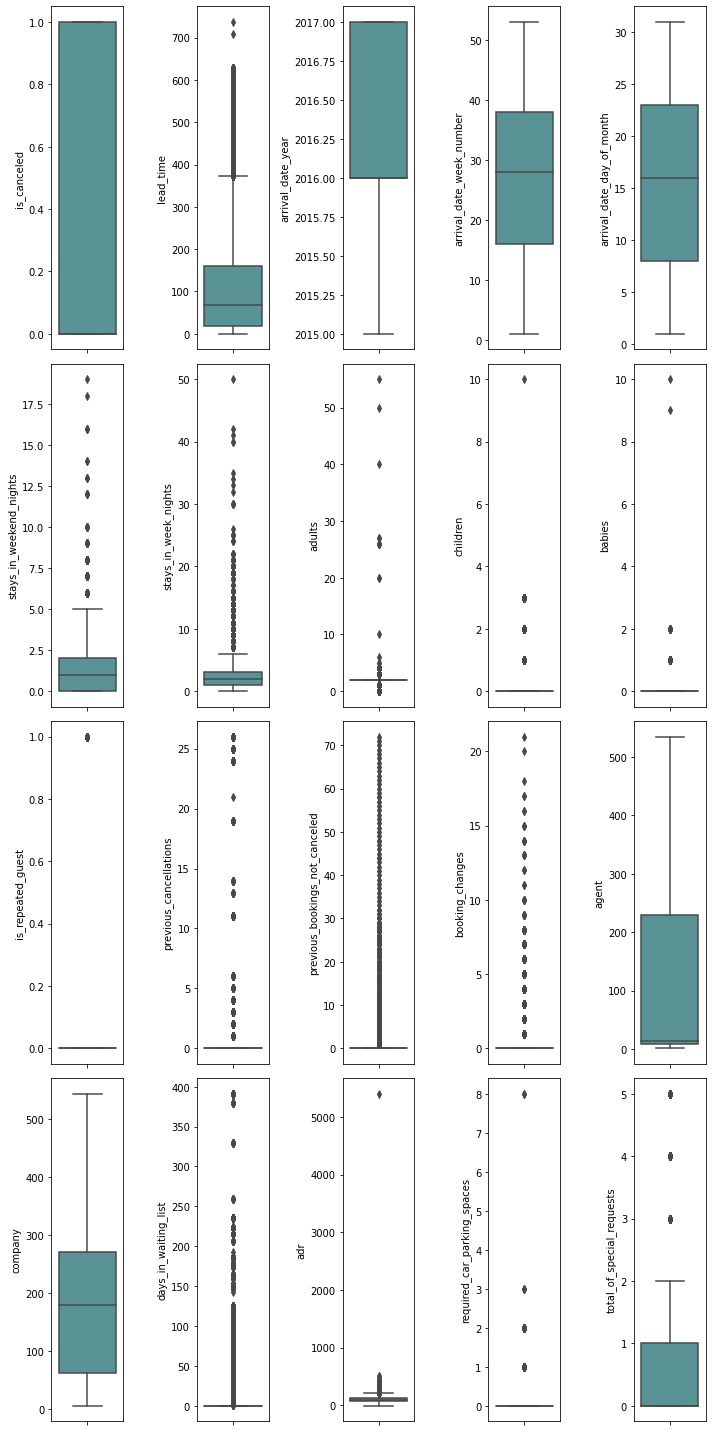

In [ ]:
features = numericals
plt.figure(figsize=(10, 20))
for i in range(0, len(features)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(y=df[features[i]], color='#509ca0', orient='v')
    plt.tight_layout();

### Distplot (Numerical)

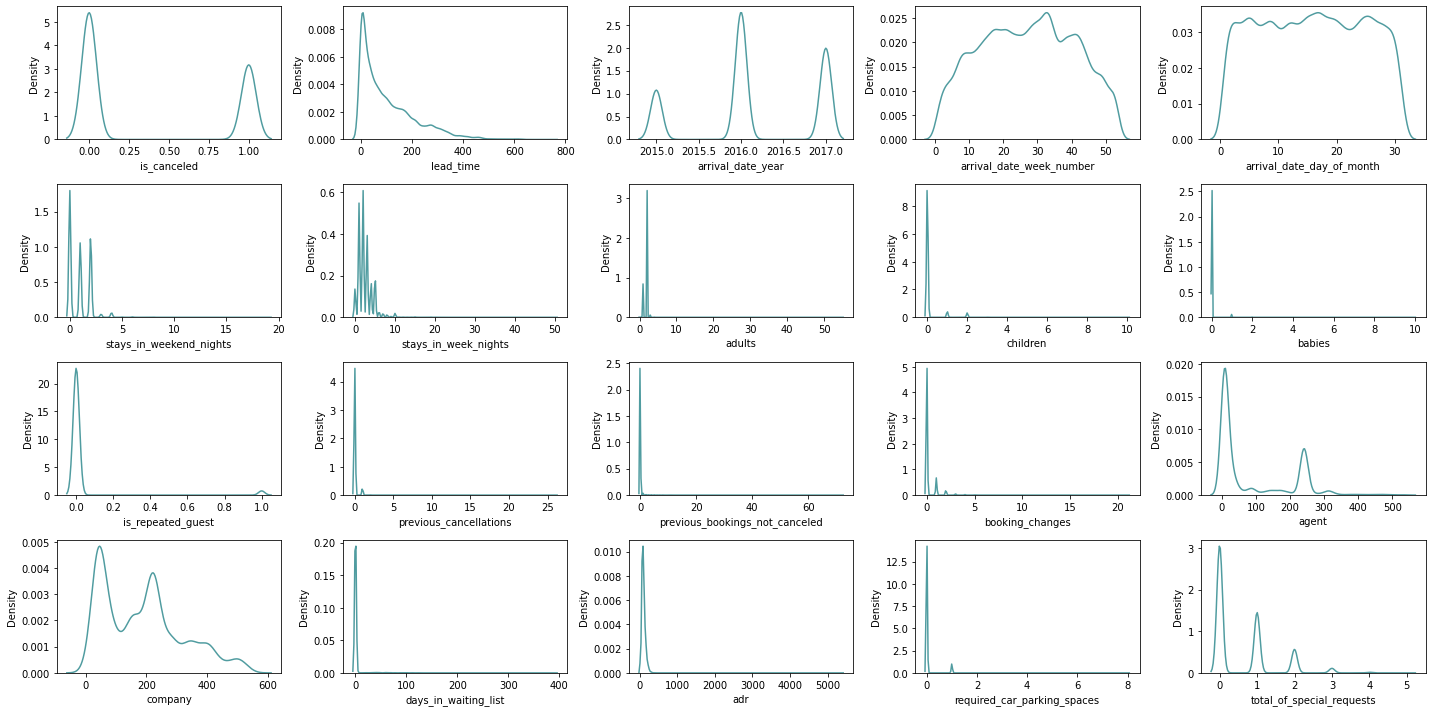

In [ ]:
features = numericals
plt.figure(figsize=(20, 10))
for i in range(0, len(features)):
    plt.subplot(4, 5, i+1)
    sns.kdeplot(x=df[features[i]], color='#509ca0')
    plt.xlabel(features[i])
    plt.tight_layout();

### Violin Plots (Numeric)

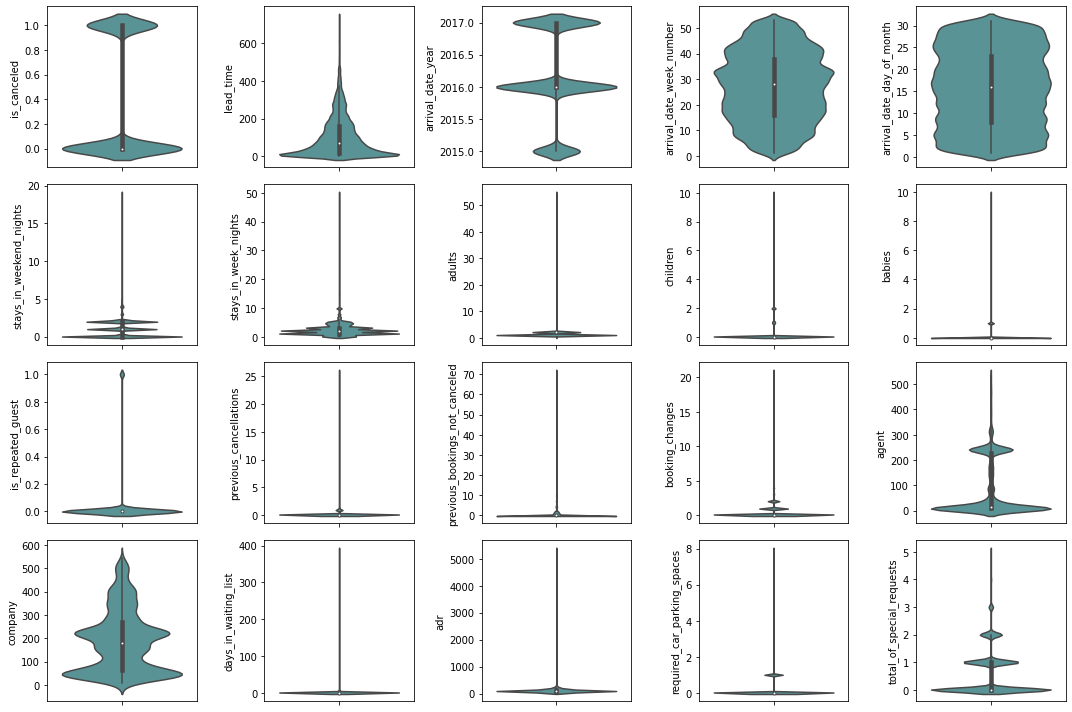

In [ ]:
features = numericals
plt.figure(figsize=(15, 10))
for i in range(0, len(features)):
    plt.subplot(4, 5, i+1)
    sns.violinplot(y=df[features[i]], color='#509ca0')
    plt.tight_layout();

### Countplot (Categorical)

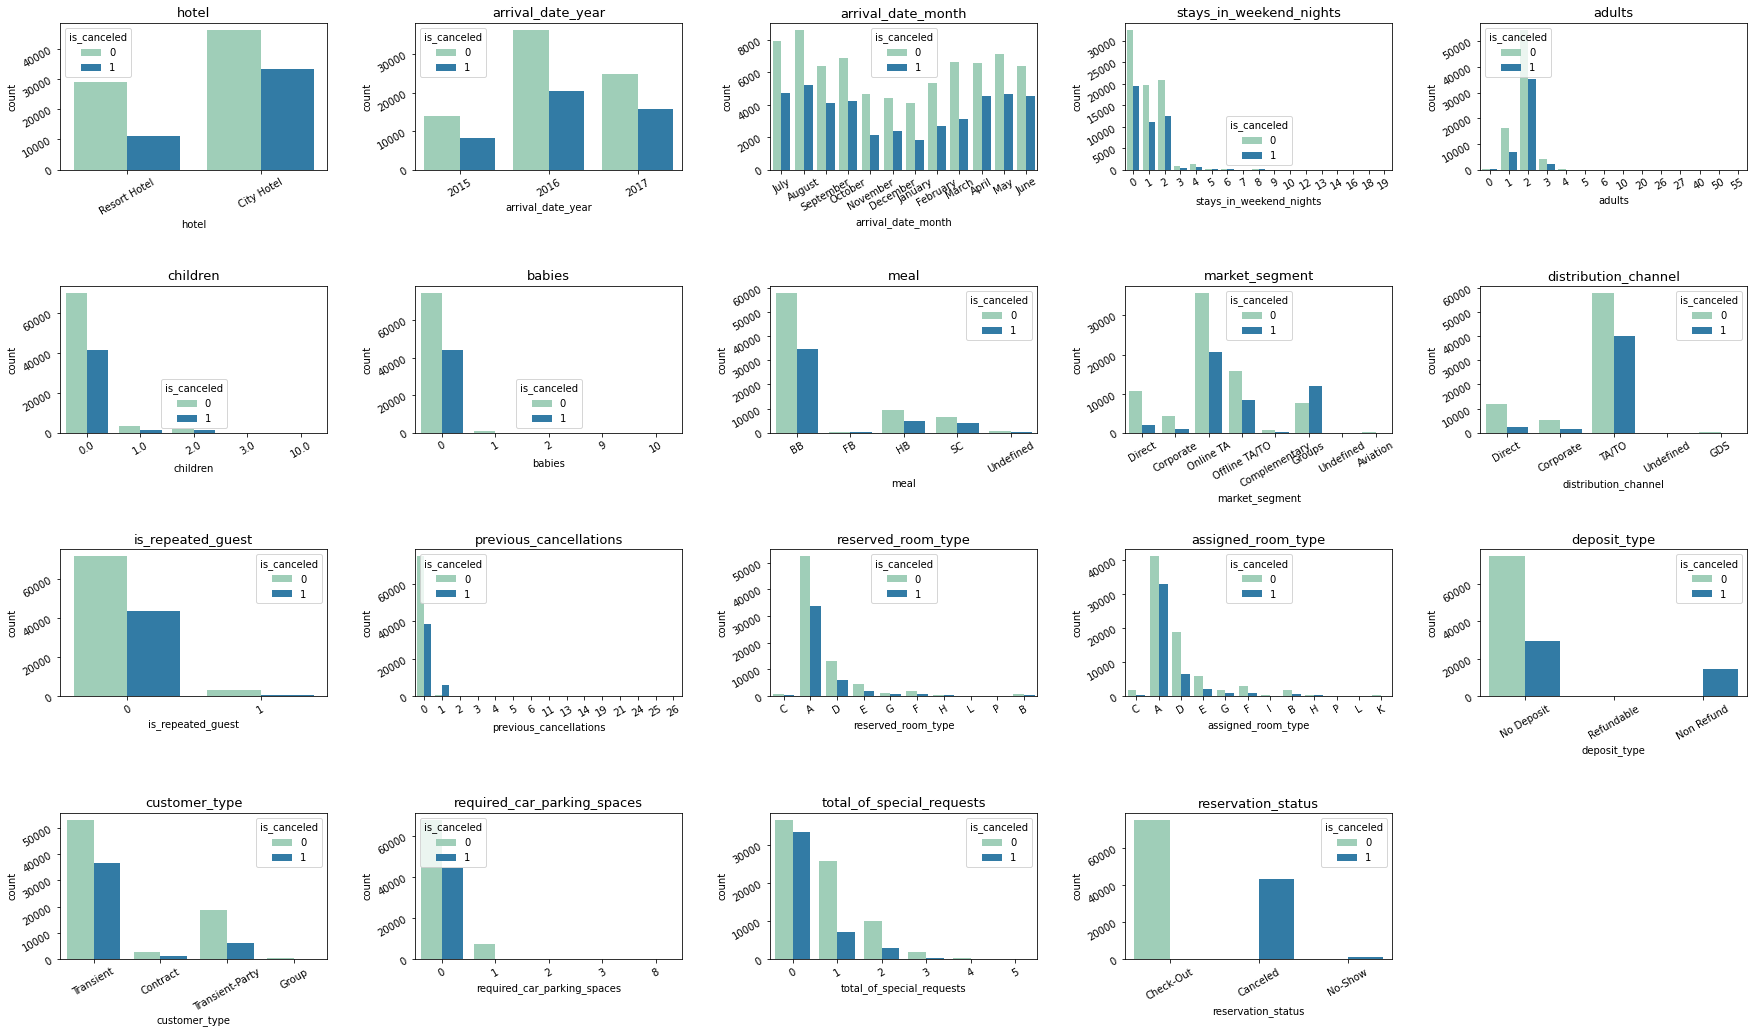

In [ ]:
d_visual = df.nunique()[df.nunique()<20].drop(["is_canceled"]).index
fig = plt.figure(figsize=(25,15))
for index, col in enumerate(d_visual):
    ax = fig.add_subplot(4, 5, index+1)
    ax.set_title(col,fontsize=13)
    ax.tick_params(labelrotation=30)
    sns.countplot(df[col], hue=df.is_canceled, ax=ax, palette="YlGnBu")
plt.tight_layout(pad=3);

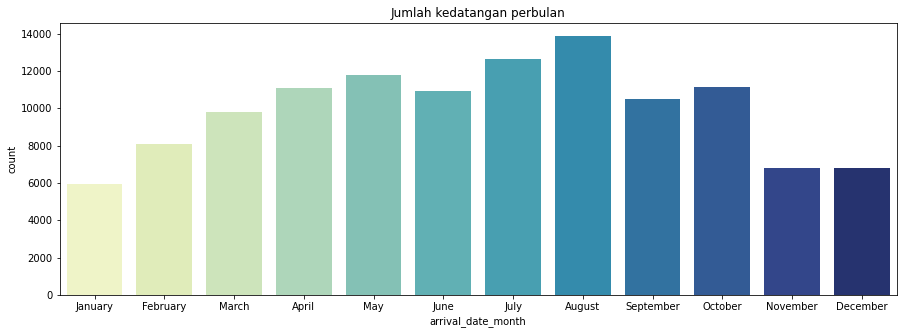

In [ ]:
plt.figure(figsize=(15, 5));
plt.title("Jumlah kedatangan perbulan");
sns.countplot(df.arrival_date_month, palette="YlGnBu", order=calendar.month_name[1:]);

In [ ]:
df_country = df['country'].value_counts()
df_country.describe()

count      177.000000
mean       671.762712
std       3931.154035
min          1.000000
25%          2.000000
50%         12.000000
75%         74.000000
max      48590.000000
Name: country, dtype: float64

Text(0.5, 1.0, 'Hotel Booking Berdasarkan Negara')

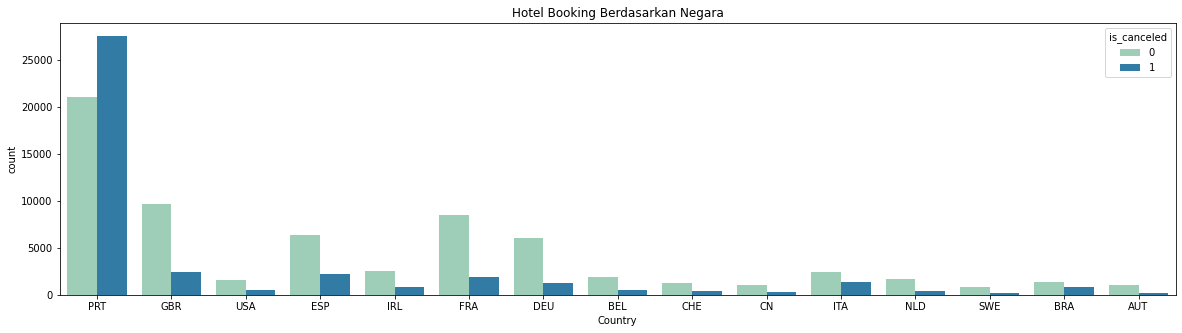

In [ ]:
df_country = df['country'].value_counts().sort_values(ascending=False)[:15]
plt.figure(figsize=(20,5))
sns.countplot(x='country', hue='is_canceled', data=df[df['country'].isin(df_country.index)], palette="YlGnBu")
plt.xlabel("Country")
plt.title("Hotel Booking Berdasarkan Negara")

## Multivariate Analysis

### Correlation Heatmap

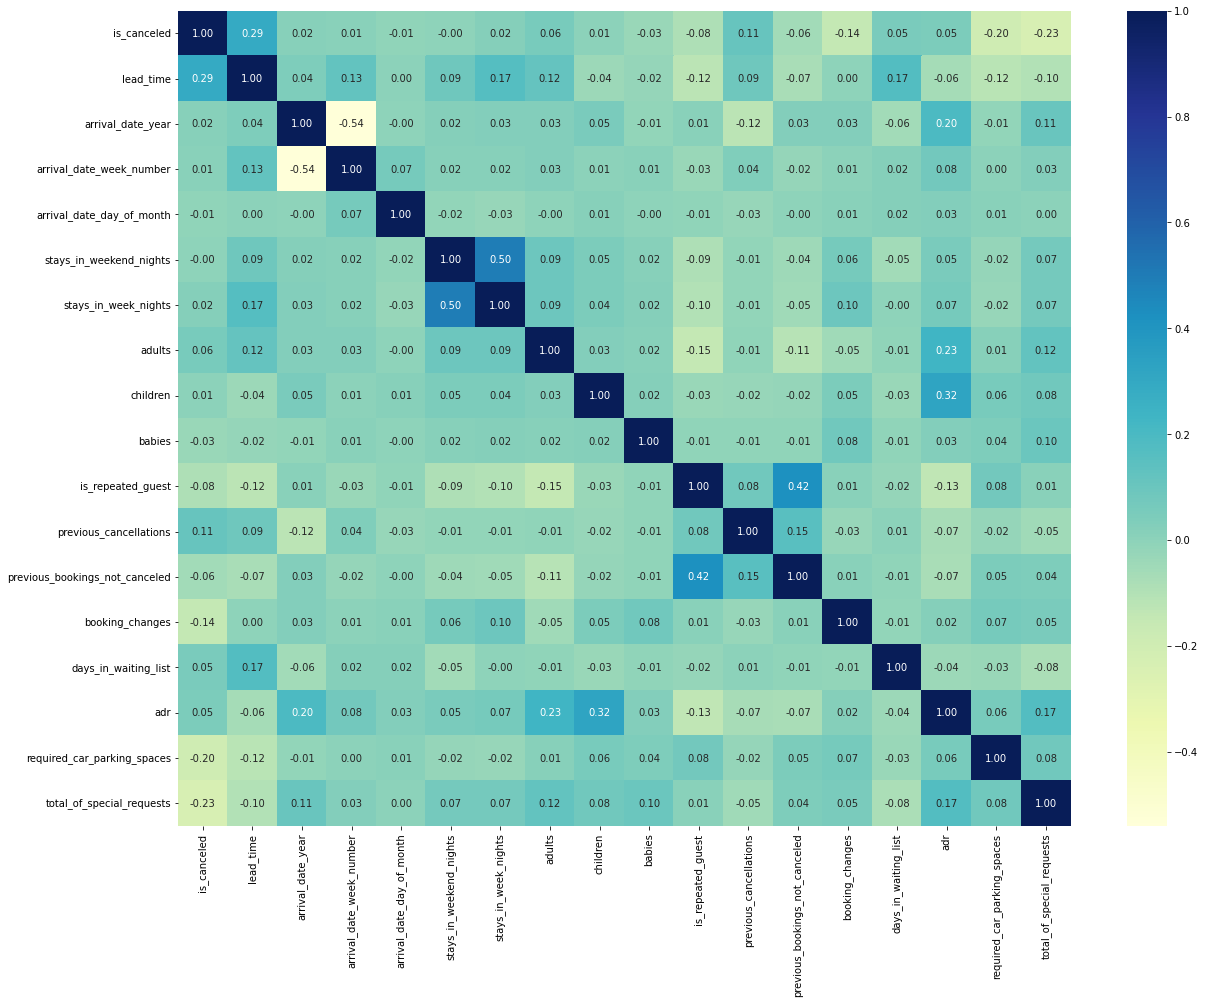

In [ ]:
df2 = df.drop(['agent', 'company'], axis=1)
numericals2 = df2.loc[:, (df2.dtypes == int) | (df2.dtypes == float)].columns.tolist()
plt.figure(figsize=(20,15))
sns.heatmap(df2[numericals2].corr(), cmap='YlGnBu', annot=True, fmt='.2f');

### Pair Plots (Numeric)

<Figure size 1080x1080 with 0 Axes>

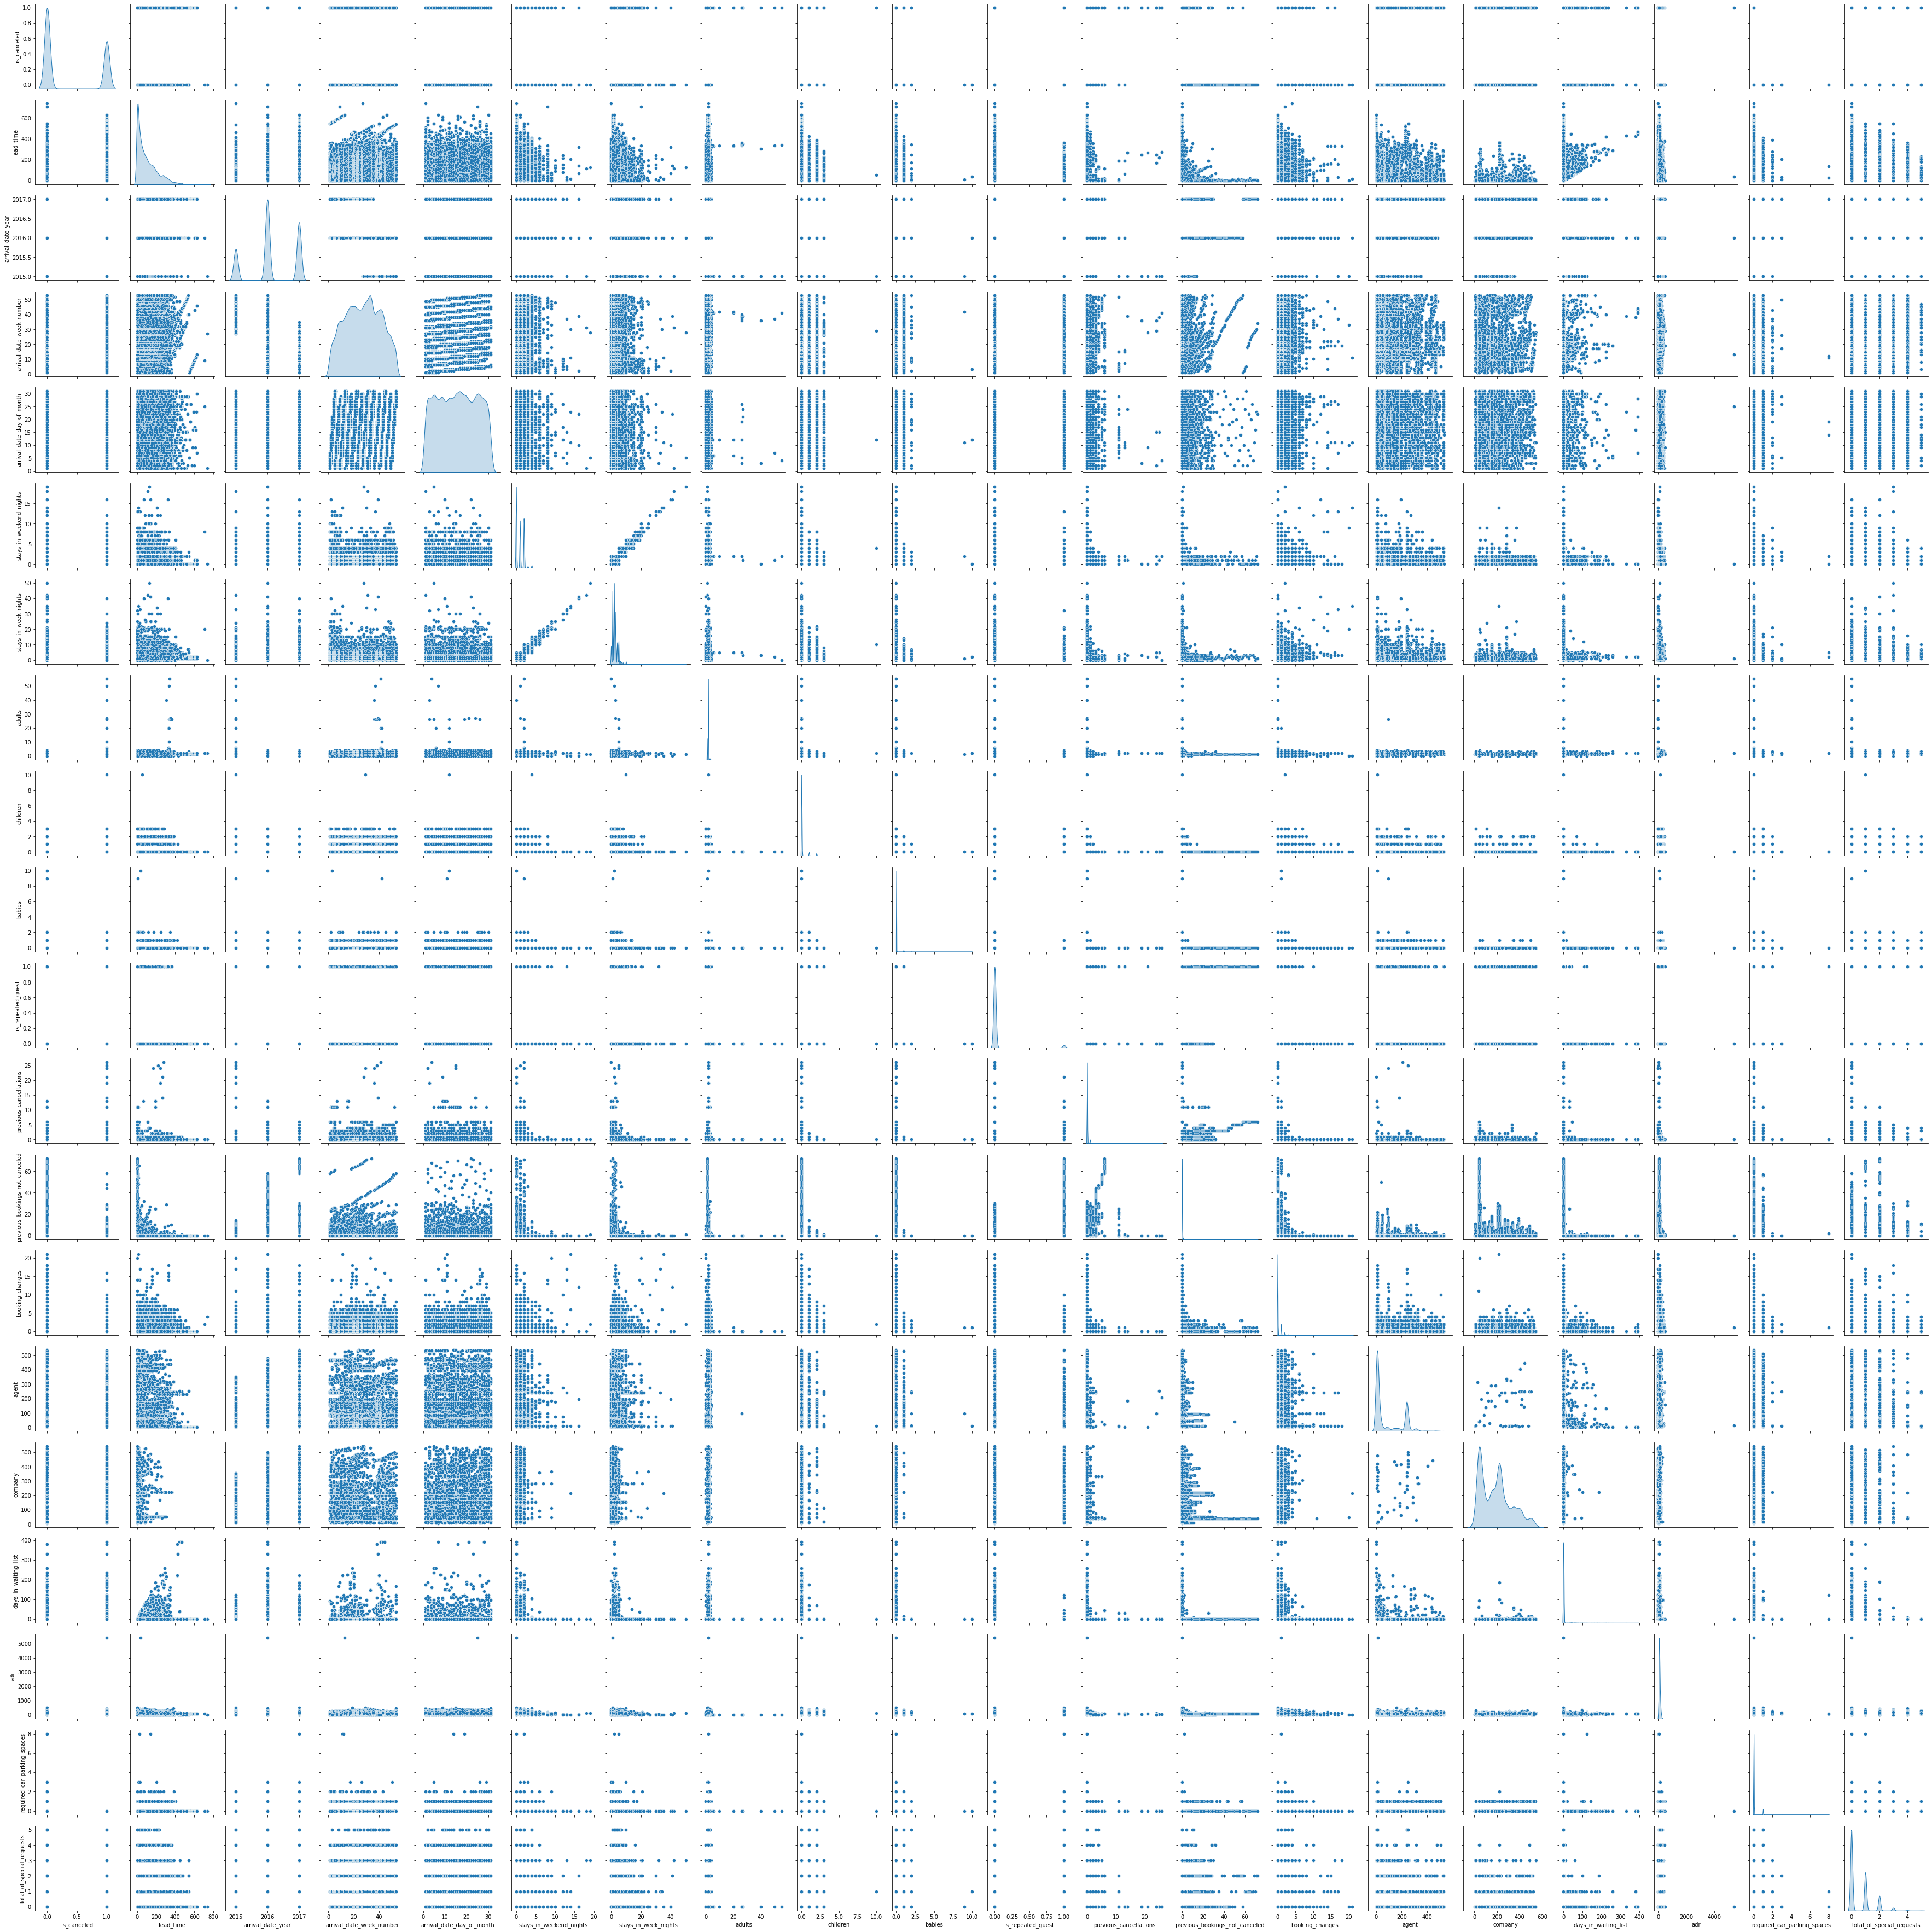

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df[numericals], diag_kind='kde', palette='#509ca0')
plt.show()

## Insight Descriptive Statistics
### Pengamatan :
* Data terdiri dari 119390 baris dan 36 kolom
* Tampak beberapa kolom masih memiliki null/missing values (Non-Null Count < jumlah baris)
* Pada kolom company ditemukan jumlah null/missing values yang sangat banyak, dimana dari 119390 baris ditemukan jumlah baris yang non-null hanya 6797
* Pada kolom children, tipe data float64 kurang sesuai karena kolom tersebut menunjukkan jumlah anak (number of childern). Tipe data yang sesuai seharusnya int64
* Pada kolom company dan agent, tipe data float64 juga kurang sesuai karena kooom tersebut menunjukkan ID. Tipe data yang lebih baik adalah object
* Pada kolom reservation_status_date bertipe object, seharusnya bertipe datetime
* Tidak terdapat data yang duplicate

# Insight Univariate Analysis
* Berdasarkan visualisasi countplot, pada kolom hotel terlihat bahwa City Hotel memiliki jumlah cancellation tertinggi.
* Pada bagian boxplot, beberapa variable memiliki data yang cenderung miring ke kanan (skewness positif) dan beberapa cenderung miring ke kiri (skewness kiri).
* Beberapa variabel memiliki data outlier yang harus ditindaklanjut, seperti kolom *lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, previous_cancellation, previous_boking_not_canceled, booking_changes, days_in_waiting_list, adr, required_car_parking_lot, total_of_special_request*
* Bila dilihat secara visual pada Distplot, variabel arrival_date_week_number memiliki distribusi normal.





## Insight Multivariate
*   Terlihat Target memiliki korelasi positif dengan fitur *adr, days_in_waiting_list, previous_cancellations, children, adults, stays_in_weeks_nights, arrival_date_week_number, arrival_date_year, lead_time*
*   Tidak ada variabel yang berpotensi redundant.
*   stays_in_weeks_night dan stays_in_weekend_night memiliki nilai korelasi paling tinggi yaitu 0,5.




